In [1]:
import os
import tensorflow as tf
from tensorflow import keras

C:\Users\aliba\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\aliba\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\aliba\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\aliba\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
train_empty_dir = os.path.join('pk-train/Empty')

train_occupied_dir = os.path.join('pk-train-/Occupied')

validation_empty_dir = os.path.join('pk-val/Empty')

validation_occpied_dir = os.path.join('pk-val/Occupied')

In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 40, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [75]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 30, 38, 16)        448       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 15, 19, 16)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 13, 17, 32)        4640      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 6, 8, 32)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 4, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 2, 3, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 384)             

In [76]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        'pk-train/',  
        target_size=(32, 40),  
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'pk-val/', 
        target_size=(32, 40), 
        batch_size=32,
        class_mode='binary')

Found 18280 images belonging to 2 classes.
Found 7474 images belonging to 2 classes.


In [78]:
history = model.fit(
      train_generator,
      steps_per_epoch=4,  
      epochs=25,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=4)

Epoch 1/25
4/4 [==============================] - 4s 1s/step - loss: 0.6871 - acc: 0.4961 - val_loss: 0.6885 - val_acc: 0.4062
Epoch 2/25
4/4 [==============================] - 0s 71ms/step - loss: 0.6757 - acc: 0.5312 - val_loss: 0.6791 - val_acc: 0.4062
Epoch 3/25
4/4 [==============================] - 0s 74ms/step - loss: 0.6651 - acc: 0.5273 - val_loss: 0.6681 - val_acc: 0.4062
Epoch 4/25
4/4 [==============================] - 1s 157ms/step - loss: 0.6532 - acc: 0.5645 - val_loss: 0.6542 - val_acc: 0.6953
Epoch 5/25
4/4 [==============================] - 1s 293ms/step - loss: 0.6416 - acc: 0.7344 - val_loss: 0.6372 - val_acc: 0.8516
Epoch 6/25
4/4 [==============================] - 1s 295ms/step - loss: 0.6204 - acc: 0.8164 - val_loss: 0.6294 - val_acc: 0.7266
Epoch 7/25
4/4 [==============================] - 1s 299ms/step - loss: 0.5984 - acc: 0.7559 - val_loss: 0.6055 - val_acc: 0.8359
Epoch 8/25
4/4 [==============================] - 1s 302ms/step - loss: 0.5845 - acc: 0.8574 - 

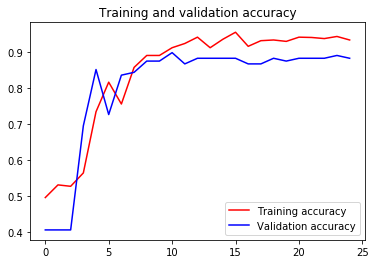

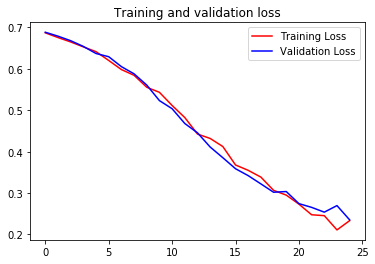

In [79]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [80]:
model.save('park.h5')

In [22]:
import numpy as np
import cv2

In [23]:
imageA = 'pk-test/2012-11-11_06_23_46#001.jpg'
imageB = 'pk-test/2012-11-11_12_09_01#059.jpg'
imageC = 'pk-test/2012-11-11_06_23_46#023.jpg'

def getDemoPrediction(file, model):
    model = tf.keras.models.load_model(model)
    img = keras.preprocessing.image.load_img(
    file, target_size=(32, 40))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    result = model.predict(img_array, steps=1)
    result = np.rint(result)
    print(predictions[0])
    if (result): 
        print('This spot is occupied')
    else:
        print('This spot is available')

# First result (imageA) empty
getDemoPrediction(imageA,'park.h5')

# Second result (imageB) occupied
getDemoPrediction(imageB,'park.h5')

# Second result (imageC) empty
getDemoPrediction(imageC,'park.h5')

[0.]
This spot is available
[0.]
This spot is available
[0.]
This spot is available


In [19]:
imageA = 'pk-test/2012-11-11_06_23_46#001.jpg'
imageB = 'pk-test/2012-11-11_12_09_01#059.jpg'
imageC = 'pk-test/2012-11-11_06_23_46#023.jpg'

def getDemoPrediction(file, model):
    model = tf.keras.models.load_model(model)
    img = keras.preprocessing.image.load_img(
    file, target_size=(32, 40))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array, steps=1)
    print(predictions[0])
    if predictions[0]>0.5:
        print("This spot is Empty")
    else:
        print("This spot is Occupied")

# First result (imageA) empty
getDemoPrediction(imageA,'park.h5')

# Second result (imageB) occupied
getDemoPrediction(imageB,'park.h5')

# Second result (imageC) empty
getDemoPrediction(imageC,'park.h5')

[0.]
This spot is Occupied
[0.]
This spot is Occupied
[0.]
This spot is Occupied


In [11]:
model = tf.keras.models.load_model('park.h5')

img = keras.preprocessing.image.load_img(
    'pk-test/2012-11-11_06_23_46#001.jpg', target_size=(32, 40)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array, steps=1)
score = tf.nn.softmax(predictions[0])

In [16]:
print(predictions[0])
if predictions[0]>0.5:
    print("Occupied")
else:
    print("Empty")

[0.]
Empty


In [17]:
print(score)

Tensor("Softmax:0", shape=(1,), dtype=float32)
